In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Reading Data set**

In [ ]:
product_details = pd.read_csv(r"C:\Users\HomePC\Documents\Perishable Goods Prediction\perishable_dataset\data\product_details.csv")
store_info = pd.read_csv(r"C:\Users\HomePC\Documents\Perishable Goods Prediction\perishable_dataset\data\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\HomePC\Documents\Perishable Goods Prediction\perishable_dataset\data\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\HomePC\Documents\Perishable Goods Prediction\perishable_dataset\data\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\HomePC\Documents\Perishable Goods Prediction\perishable_dataset\data\weekly_sales.csv")

# **EDA Stage 1 Function**

In [ ]:
def eda_stage_1(dataframe, name):
  print(f"{name} dataframe information")
  print("="*60)
  print(dataframe.info())
  print("\n")
  print(f"{name} missing values information")
  print("="*60)
  print(dataframe.isnull().sum())
  print("\n")
  print(f"{name} describtion information")
  print("="*60)
  print(dataframe.describe())

# **Product details DataFrame**

In [ ]:
product_details.head(5)

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7


# **Exploratory Data Analysis stage 1**

## **Product Details Exploratory Data analysis stage 1**

In [ ]:
eda_stage_1(product_details, name = "product_detail")

product_detail dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None


product_detail missing values information
Product_ID          0
Product_Name        0
Product_Category    0
Shelf_Life_Days     0
Supplier_ID         0
dtype: int64


product_detail describtion information
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000  

# **Store Info Data Frame**

In [ ]:
store_info.head(5)

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330


## **Store Info Exploratory Data analysis stage 1**

In [ ]:
eda_stage_1(store_info, name = "Store Info")

Store Info dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Store_ID               15 non-null     int64 
 1   Region                 15 non-null     object
 2   Store_Size             15 non-null     int64 
 3   Cold_Storage_Capacity  15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
None


Store Info missing values information
Store_ID                 0
Region                   0
Store_Size               0
Cold_Storage_Capacity    0
dtype: int64


Store Info describtion information
         Store_ID    Store_Size  Cold_Storage_Capacity
count   15.000000     15.000000              15.000000
mean   507.000000   5333.333333            1527.066667
std      4.472136   2894.987458             965.651628
min    500.000000   3000.000000             634.000000
25%    503.500000   3500.0

# **Supplier Info Data Frame**

In [ ]:
supplier_info.head()

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306


## **Supplier info exploratory data analysis stage 1**

In [ ]:
eda_stage_1(supplier_info, name = "Supplier Info")

Supplier Info dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Supplier_ID      10 non-null     int64 
 1   Supplier_Name    10 non-null     object
 2   Lead_Time_Days   10 non-null     int64 
 3   Supply_Capacity  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes
None


Supplier Info missing values information
Supplier_ID        0
Supplier_Name      0
Lead_Time_Days     0
Supply_Capacity    0
dtype: int64


Supplier Info describtion information
       Supplier_ID  Lead_Time_Days  Supply_Capacity
count     10.00000       10.000000        10.000000
mean       5.50000        2.200000     48161.200000
std        3.02765        0.632456     18121.601841
min        1.00000        1.000000     11306.000000
25%        3.25000        2.000000     38162.250000
50%        5.50000        2.000000     51

# **Weather info DataFrame**

In [ ]:
weather_data.head()

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1


# **Weather info exploratory data analysis stage 1**

In [ ]:
eda_stage_1(weather_data, name="Weather Data")

Weather Data dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_Number      364 non-null    object 
 1   Region           364 non-null    object 
 2   Avg_Temperature  364 non-null    float64
 3   Rainfall         364 non-null    float64
 4   Holiday_Flag     364 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB
None


Weather Data missing values information
Week_Number        0
Region             0
Avg_Temperature    0
Rainfall           0
Holiday_Flag       0
dtype: int64


Weather Data describtion information
       Avg_Temperature    Rainfall  Holiday_Flag
count       364.000000  364.000000    364.000000
mean         10.015110   20.847253      0.148352
std           6.136098   10.459884      0.355937
min          -2.000000    6.600000      0.000000
25%           4.500000   12

In [ ]:
weather_data["Holiday_Flag"].value_counts()

,count
Holiday_Flag,
0,310
1,54


# **Weekly Sales DataFrame**

In [ ]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46


## **Weekly Sales Exploratory Data analysis stage 1**

In [ ]:
eda_stage_1(weekly_sales, name="Weekly Sales")

Weekly Sales dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB
None


Weekly Sales missing values information
Week_Number         0
Product_ID          0
Store_ID            0
Units_Sold          0
Marketing_Spend     0
Discount_Percent    0
Wastage_Units       0
Price               0
dtype: int64


Weekly Sales describtion information
         Product_ID      Store_ID  ...  Wastage_Un

# **Exploratory Data Analysis Stage 2**

In [ ]:
# Set up plotting style for better visuals
plt.style.use('default')
sns.set_palette("husl")

print("Data loaded successfully!")
print(f"Weekly Sales records: {len(weekly_sales):,}")
print(f"Products: {len(product_details)}")
print(f"Stores: {len(store_info)}")

Data loaded successfully!
Weekly Sales records: 37,440
Products: 48
Stores: 15


In [ ]:
# Cell 2: Basic Overview - Data Summary
print("=== BASIC DATA OVERVIEW ===")

print("\nProduct Categories Distribution:")
print(product_details['Product_Category'].value_counts())

print("\nStore Regions Distribution:")
print(store_info['Region'].value_counts())

print("\nWeekly Sales Summary:")
print(f"Time Period: {weekly_sales['Week_Number'].min()} to {weekly_sales['Week_Number'].max()}")
print(f"Average Units Sold: {weekly_sales['Units_Sold'].mean(skipna=True):.0f} units")
print(f"Total Wastage Units: {weekly_sales['Wastage_Units'].sum(skipna=True):,} units")
print(f"Total Units Sold: {weekly_sales['Units_Sold'].sum(skipna=True):,} units")


=== BASIC DATA OVERVIEW ===

Product Categories Distribution:
Product_Category
Bakery       12
Meat         12
Dairy        12
Beverages    12
Name: count, dtype: int64

Store Regions Distribution:
Region
South West    4
London        3
Midlands      3
North East    2
North West    2
South East    1
Name: count, dtype: int64

Weekly Sales Summary:
Time Period: 2024-W01 to 2024-W52
Average Units Sold: 1642 units
Total Wastage Units: 4,786,490 units
Total Units Sold: 61,482,249 units


In [ ]:
# Compute wastage rate
wastage_rate = (weekly_sales['Wastage_Units'].sum(skipna=True) /
                weekly_sales['Units_Sold'].sum(skipna=True) * 100)

print(f"Wastage Rate: {wastage_rate:.2f}% of units sold")


Wastage Rate: 7.79% of units sold


In [ ]:
print(f"Total Weekly Sales Records: {len(weekly_sales):,}")


Total Weekly Sales Records: 37,440


Text(0.5, 1.0, 'Product Categories Distribution')

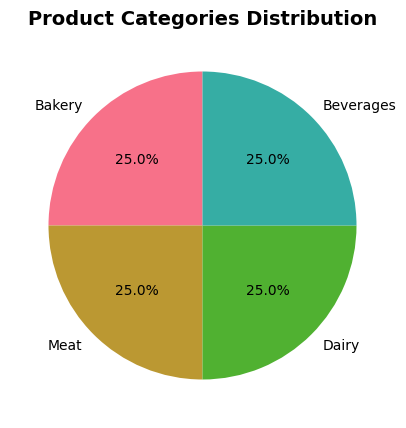

In [ ]:
# Cell 3: Product Category Analysis - Pie Chart
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
category_counts = product_details['Product_Category'].value_counts()
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Categories Distribution', fontsize=14, fontweight='bold')

# plt.subplot(1, 2, 2)
# # Average price by category
# category_prices = weekly_sales.merge(product_details, on='Product_ID')
# avg_price_by_category = category_prices.groupby('Product_Category')['Your_Price'].mean().sort_values(ascending=False)
# avg_price_by_category.plot(kind='bar', color='skyblue')
# plt.title('Average Price by Product Category', fontsize=14, fontweight='bold')
# plt.xlabel('Product Category')
# plt.ylabel('Average Price (£)')
# plt.xticks(rotation=45)
# plt.grid(axis='y', alpha=0.3)

# plt.tight_layout()
# plt.show()

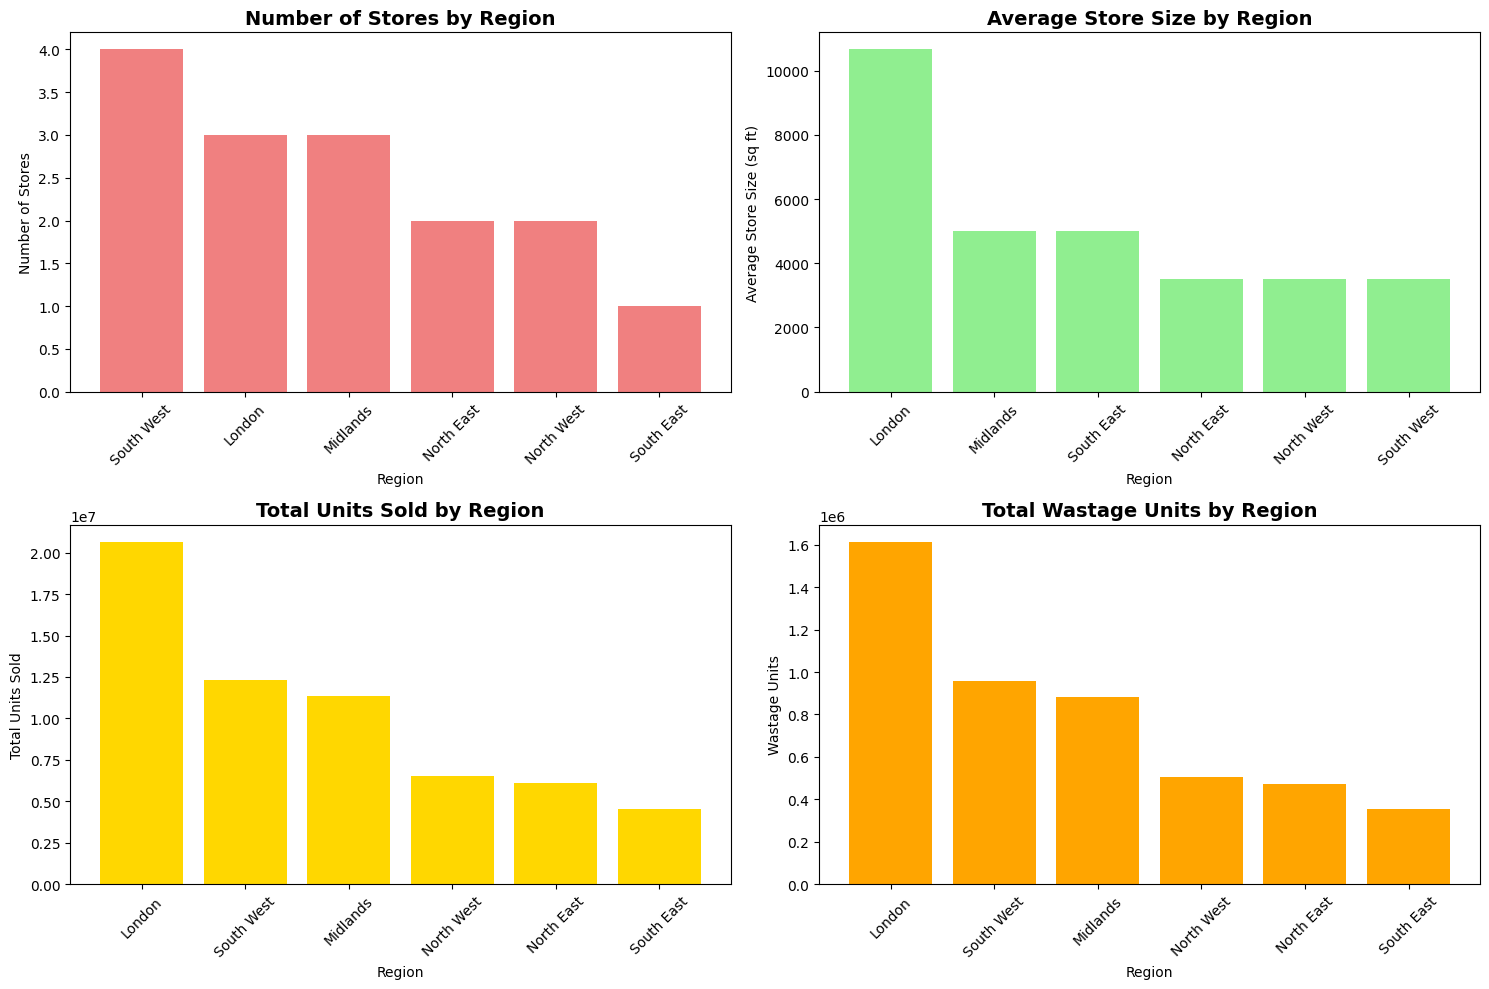

In [ ]:
# Cell 4: Regional Store Distribution - Bar Charts
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
region_store_count = store_info['Region'].value_counts()
plt.bar(region_store_count.index, region_store_count.values, color='lightcoral')
plt.title('Number of Stores by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
region_avg_size = store_info.groupby('Region')['Store_Size'].mean().sort_values(ascending=False)
plt.bar(region_avg_size.index, region_avg_size.values, color='lightgreen')
plt.title('Average Store Size by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Average Store Size (sq ft)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# Sales performance by region
region_sales = weekly_sales.merge(store_info, on='Store_ID')
total_sales_by_region = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
plt.bar(total_sales_by_region.index, total_sales_by_region.values, color='gold')
plt.title('Total Units Sold by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Wastage by region
wastage_by_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
plt.bar(wastage_by_region.index, wastage_by_region.values, color='orange')
plt.title('Total Wastage Units by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

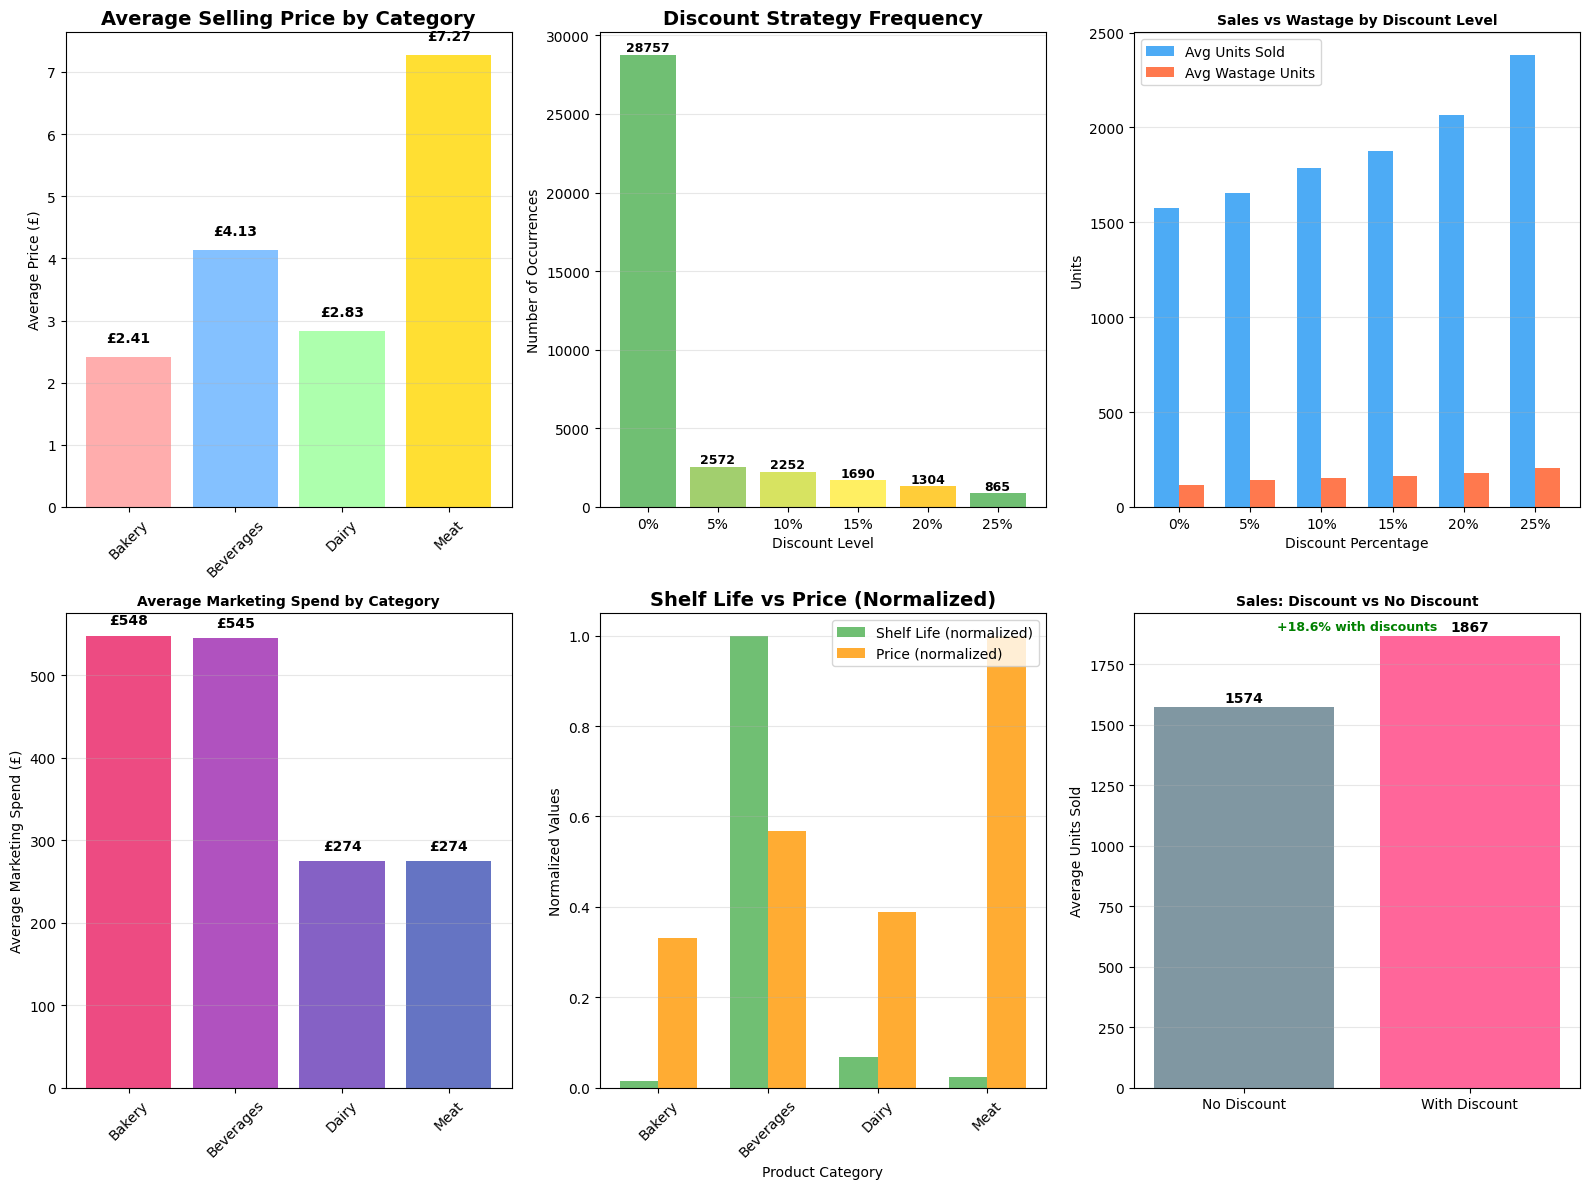


=== PRICING & PROMOTION INSIGHTS ===
• Meat products have highest average price: £7.27
• Most common discount: 0% (28757 occurrences)
• Discounts increase sales by 18.6% on average
• Highest marketing spend: Bakery category (£548)


In [ ]:
# Cell 5: Pricing and Promotion Analysis - Business Focus

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
# Price distribution across categories
category_prices = weekly_sales.merge(product_details, on='Product_ID')
price_by_category = category_prices.groupby('Product_Category')['Price'].mean()
plt.bar(price_by_category.index, price_by_category.values,
        color=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'], alpha=0.8)
plt.title('Average Selling Price by Category', fontsize=14, fontweight='bold')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(price_by_category.values):
    plt.text(i, v + 0.2, f'£{v:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.subplot(2, 3, 2)
# Discount strategy analysis
discount_frequency = weekly_sales['Discount_Percent'].value_counts().sort_index()
plt.bar([f'{x}%' for x in discount_frequency.index], discount_frequency.values,
        color=['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107'], alpha=0.8)
plt.title('Discount Strategy Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Discount Level')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(discount_frequency.values):
    plt.text(i, v + 50, f'{v}', ha='center', va='bottom', fontweight='bold', fontsize=9)



plt.subplot(2, 3, 3)
# Sales performance by discount level
discount_performance = weekly_sales.groupby('Discount_Percent').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

x = np.arange(len(discount_performance))
width = 0.35

bars1 = plt.bar(x - width/2, discount_performance['Units_Sold'], width,
                label='Avg Units Sold', color='#2196F3', alpha=0.8)
bars2 = plt.bar(x + width/2, discount_performance['Wastage_Units'], width,
                label='Avg Wastage Units', color='#FF5722', alpha=0.8)

plt.title('Sales vs Wastage by Discount Level', fontsize=10, fontweight='bold')
plt.xlabel('Discount Percentage')
plt.ylabel('Units')
plt.xticks(x, [f'{x}%' for x in discount_performance['Discount_Percent']])
plt.legend()
plt.grid(axis='y', alpha=0.3)




plt.subplot(2, 3, 4)
# Marketing spend effectiveness by category
marketing_by_category = category_prices.groupby('Product_Category')['Marketing_Spend'].mean()
plt.bar(marketing_by_category.index, marketing_by_category.values,
        color=['#E91E63', '#9C27B0', '#673AB7', '#3F51B5'], alpha=0.8)
plt.title('Average Marketing Spend by Category', fontsize=10, fontweight='bold')
plt.ylabel('Average Marketing Spend (£)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(marketing_by_category.values):
    plt.text(i, v + 10, f'£{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=10)


plt.subplot(2, 3, 5)
# Price vs Shelf Life analysis
shelf_life_price = category_prices.groupby('Product_Category').agg({
    'Shelf_Life_Days': 'mean',
    'Price': 'mean'
}).reset_index()

# Normalize for comparison
shelf_life_norm = shelf_life_price['Shelf_Life_Days'] / shelf_life_price['Shelf_Life_Days'].max()
price_norm = shelf_life_price['Price'] / shelf_life_price['Price'].max()

x = np.arange(len(shelf_life_price))
width = 0.35

bars1 = plt.bar(x - width/2, shelf_life_norm, width,
                label='Shelf Life (normalized)', color='#4CAF50', alpha=0.8)
bars2 = plt.bar(x + width/2, price_norm, width,
                label='Price (normalized)', color='#FF9800', alpha=0.8)

plt.title('Shelf Life vs Price (Normalized)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Normalized Values')
plt.xticks(x, shelf_life_price['Product_Category'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)




plt.subplot(2, 3, 6)
# No-discount vs discount scenarios
no_discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 0]['Units_Sold'].mean()
with_discount_sales = weekly_sales[weekly_sales['Discount_Percent'] > 0]['Units_Sold'].mean()

plt.bar(['No Discount', 'With Discount'], [no_discount_sales, with_discount_sales],
        color=['#607D8B', '#FF4081'], alpha=0.8)
plt.title('Sales: Discount vs No Discount', fontsize=10, fontweight='bold')
plt.ylabel('Average Units Sold')
plt.grid(axis='y', alpha=0.3)

# Add value labels and percentage increase
for i, v in enumerate([no_discount_sales, with_discount_sales]):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

increase_pct = ((with_discount_sales - no_discount_sales) / no_discount_sales) * 100
plt.text(0.5, max(no_discount_sales, with_discount_sales) + 10,
         f'+{increase_pct:.1f}% with discounts', ha='center', va='bottom',
         fontweight='bold', fontsize=9, color='green')

plt.tight_layout()
plt.show()

print("\n=== PRICING & PROMOTION INSIGHTS ===")
print(f"• Meat products have highest average price: £{price_by_category['Meat']:.2f}")
print(f"• Most common discount: {discount_frequency.index[0]}% ({discount_frequency.iloc[0]} occurrences)")
print(f"• Discounts increase sales by {increase_pct:.1f}% on average")
print(f"• Highest marketing spend: {marketing_by_category.idxmax()} category (£{marketing_by_category.max():.0f})")

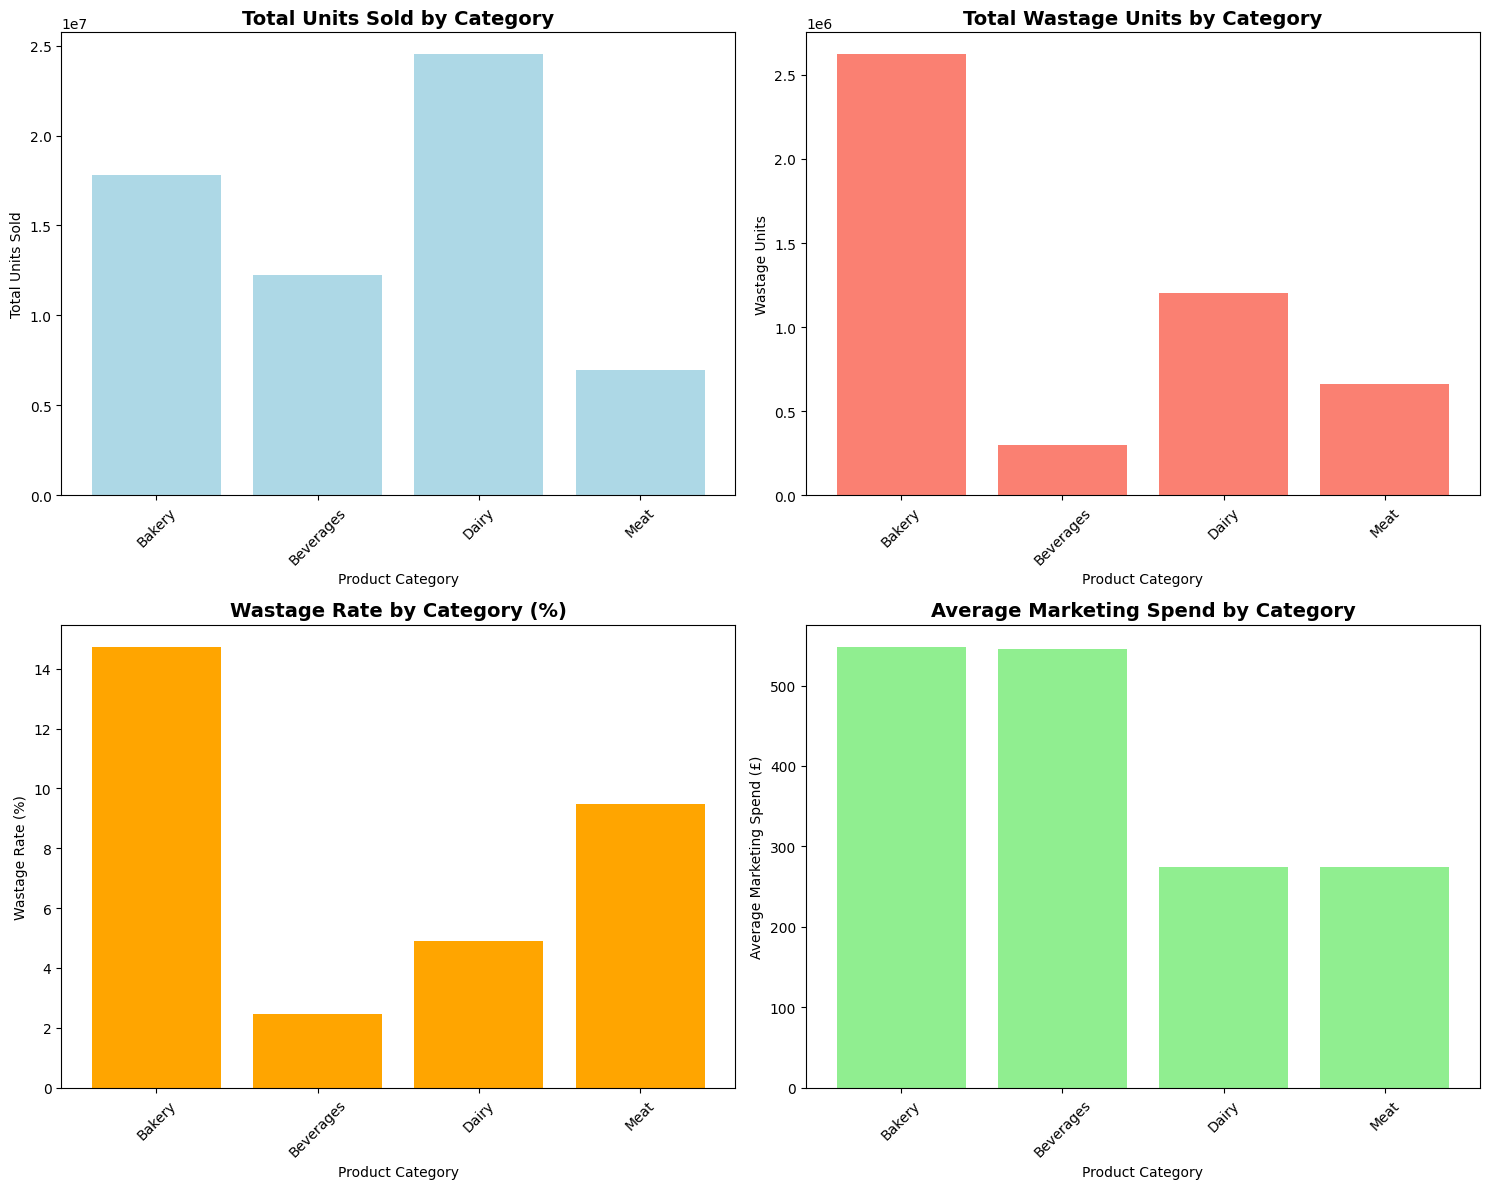

In [ ]:
# Cell 6: Sales Performance by Product Category - Comparison Bars
plt.figure(figsize=(15, 12))

# Merge sales with product details
sales_with_categories = weekly_sales.merge(product_details, on='Product_ID')

# Calculate metrics by category
category_metrics = sales_with_categories.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Price': 'mean',
    'Wastage_Units': 'sum',
    'Marketing_Spend': 'mean'
}).reset_index()

plt.subplot(2, 2, 1)
plt.bar(category_metrics['Product_Category'], category_metrics['Units_Sold'], color='lightblue')
plt.title('Total Units Sold by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Units'], color='salmon')
plt.title('Total Wastage Units by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# Wastage rate calculation
category_metrics['Wastage_Rate'] = (category_metrics['Wastage_Units'] / category_metrics['Units_Sold']) * 100
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Rate'], color='orange')
plt.title('Wastage Rate by Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(category_metrics['Product_Category'], category_metrics['Marketing_Spend'], color='lightgreen')
plt.title('Average Marketing Spend by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Average Marketing Spend (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

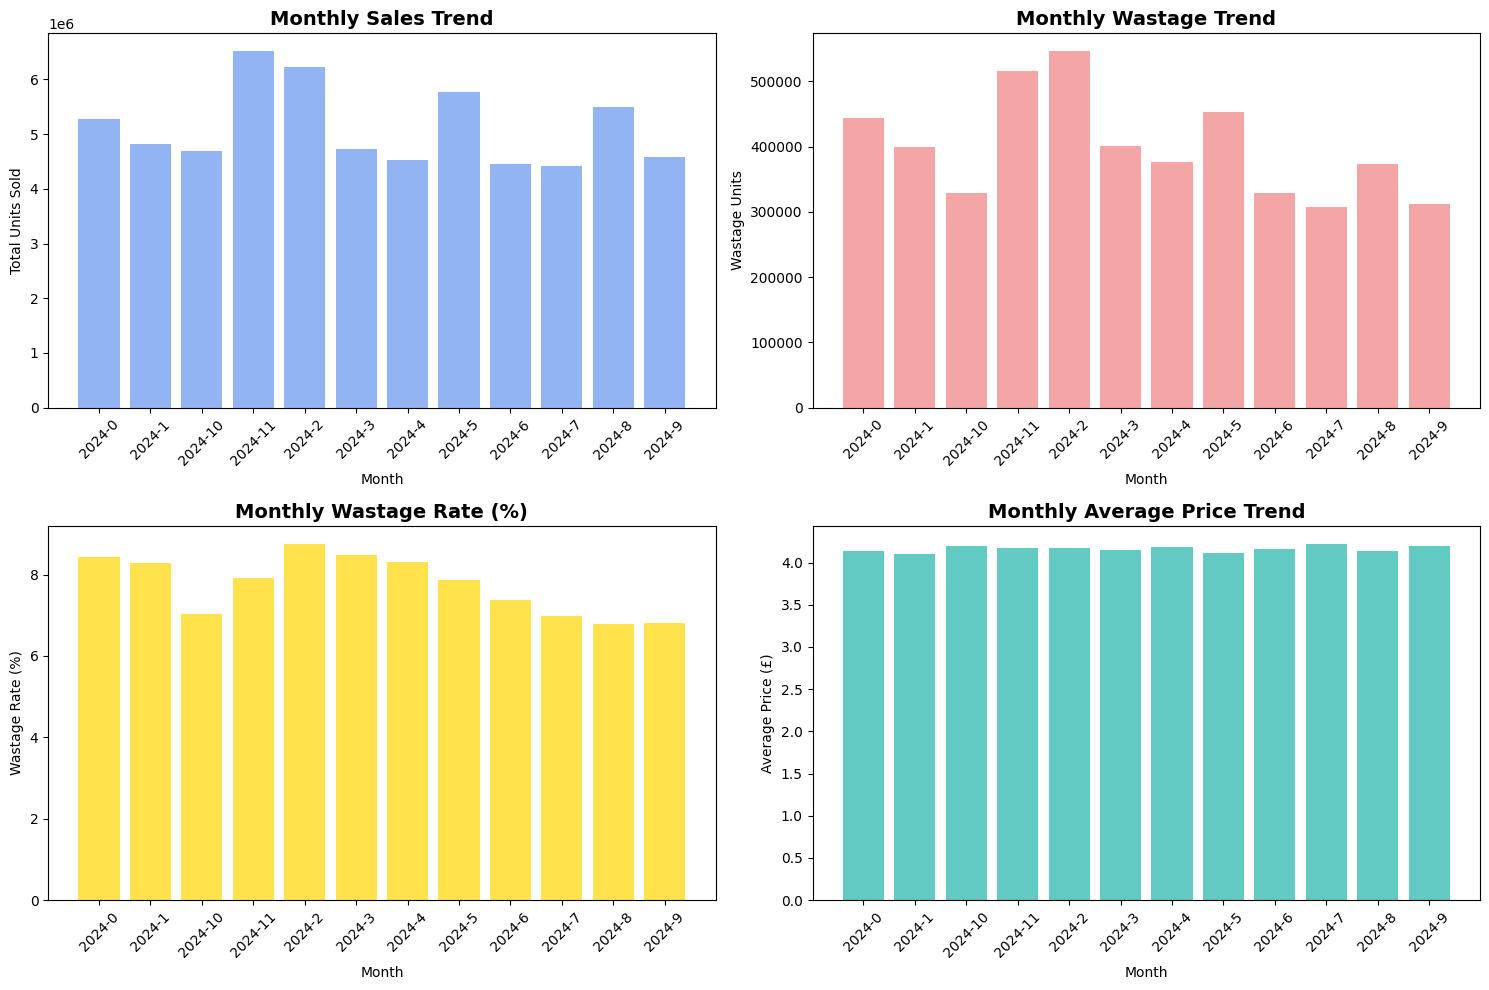

In [ ]:
# Cell 7: Seasonal Analysis - Monthly Trends
# Extract month from week number
weekly_sales['Month'] = weekly_sales['Week_Number'].str.split('-W').str[0] + '-' + \
                       (weekly_sales['Week_Number'].str.split('-W').str[1].astype(int) // 4.345).astype(int).astype(str)

monthly_sales = weekly_sales.groupby('Month').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Price': 'mean'
}).reset_index()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(monthly_sales['Month'], monthly_sales['Units_Sold'], color='cornflowerblue', alpha=0.7)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(monthly_sales['Month'], monthly_sales['Wastage_Units'], color='lightcoral', alpha=0.7)
plt.title('Monthly Wastage Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# Calculate wastage rate
monthly_sales['Wastage_Rate'] = (monthly_sales['Wastage_Units'] / monthly_sales['Units_Sold']) * 100
plt.bar(monthly_sales['Month'], monthly_sales['Wastage_Rate'], color='gold', alpha=0.7)
plt.title('Monthly Wastage Rate (%)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(monthly_sales['Month'], monthly_sales['Price'], color='lightseagreen', alpha=0.7)
plt.title('Monthly Average Price Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Cell 10: Business Insights Summary (Updated - No Competitor Price)
print("=== KEY BUSINESS INSIGHTS ===")

# Insight 1: Overall performance
total_sales = weekly_sales['Units_Sold'].sum()
total_wastage = weekly_sales['Wastage_Units'].sum()
wastage_rate = (total_wastage / total_sales) * 100

print(f"\n1. Overall Performance:")
print(f"   • Total Units Sold: {total_sales:,}")
print(f"   • Total Wastage: {total_wastage:,} units")
print(f"   • Wastage Rate: {wastage_rate:.1f}%")

# Insight 2: Best performing category
sales_with_categories = weekly_sales.merge(product_details, on='Product_ID')
category_performance = sales_with_categories.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Price': 'mean',
    'Marketing_Spend': 'mean'
}).reset_index()

category_performance['Wastage_Rate'] = (category_performance['Wastage_Units'] / category_performance['Units_Sold']) * 100

best_category = category_performance.loc[category_performance['Units_Sold'].idxmax(), 'Product_Category']
worst_wastage_category = category_performance.loc[category_performance['Wastage_Rate'].idxmax(), 'Product_Category']
highest_price_category = category_performance.loc[category_performance['Price'].idxmax(), 'Product_Category']

print(f"\n2. Category Performance:")
print(f"   • Highest Sales: {best_category}")
print(f"   • Highest Wastage Rate: {worst_wastage_category}")
print(f"   • Highest Average Price: {highest_price_category}")





# Insight 3: Regional performance
region_sales = weekly_sales.merge(store_info, on='Store_ID')
regional_performance = region_sales.groupby('Region').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Store_Size': 'mean'
}).reset_index()

regional_performance['Wastage_Rate'] = (regional_performance['Wastage_Units'] / regional_performance['Units_Sold']) * 100
regional_performance['Sales_Per_SqFt'] = regional_performance['Units_Sold'] / regional_performance['Store_Size']

best_region = regional_performance.loc[regional_performance['Units_Sold'].idxmax(), 'Region']
worst_region_wastage = regional_performance.loc[regional_performance['Wastage_Rate'].idxmax(), 'Region']
most_efficient_region = regional_performance.loc[regional_performance['Sales_Per_SqFt'].idxmax(), 'Region']

print(f"\n3. Regional Performance:")
print(f"   • Best Sales Region: {best_region}")
print(f"   • Highest Wastage Region: {worst_region_wastage}")
print(f"   • Most Efficient Region (Sales/SqFt): {most_efficient_region}")





# Insight 4: Pricing Strategy Analysis
price_ranges = [
    (weekly_sales['Price'] < 5).sum(),           # Budget items
    ((weekly_sales['Price'] >= 5) & (weekly_sales['Price'] < 10)).sum(),  # Mid-range
    (weekly_sales['Price'] >= 10).sum()          # Premium items
]
price_range_percentages = [f"{(count/len(weekly_sales)*100):.1f}%" for count in price_ranges]

avg_price = weekly_sales['Price'].mean()
price_std = weekly_sales['Price'].std()

print(f"\n4. Pricing Strategy Analysis:")
print(f"   • Average Product Price: £{avg_price:.2f}")
print(f"   • Price Distribution: {price_range_percentages[0]} budget, {price_range_percentages[1]} mid-range, {price_range_percentages[2]} premium")
print(f"   • Price Variability: £{price_std:.2f} standard deviation")





# Insight 5: Discount effectiveness
discount_effect = weekly_sales.groupby('Discount_Percent').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

best_discount_row = discount_effect.loc[discount_effect['Units_Sold'].idxmax()]
best_discount = best_discount_row['Discount_Percent']
best_discount_sales = best_discount_row['Units_Sold']

# Handle case where no discount (0%) might not exist
if 0 in discount_effect['Discount_Percent'].values:
    no_discount_sales = discount_effect[discount_effect['Discount_Percent'] == 0]['Units_Sold'].values[0]
else:
    no_discount_sales = discount_effect['Units_Sold'].min()

sales_increase_pct = ((best_discount_sales - no_discount_sales) / no_discount_sales) * 100

print(f"\n5. Promotion Effectiveness:")
print(f"   • Most effective discount level: {best_discount}%")
print(f"   • Sales increase with {best_discount}% discount: +{sales_increase_pct:.1f}%")
print(f"   • Average sales with {best_discount}% discount: {best_discount_sales:.0f} units")




# Insight 6: Marketing Spend Effectiveness
marketing_correlation = weekly_sales[['Marketing_Spend', 'Units_Sold']].corr().iloc[0,1]
avg_marketing_per_unit = weekly_sales['Marketing_Spend'].sum() / weekly_sales['Units_Sold'].sum()

print(f"\n6. Marketing Effectiveness:")
print(f"   • Correlation between marketing and sales: {marketing_correlation:.3f}")
print(f"   • Average marketing cost per unit sold: £{avg_marketing_per_unit:.2f}")




# Insight 7: Top performing products
product_performance = sales_with_categories.groupby(['Product_ID', 'Product_Name', 'Product_Category']).agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Price': 'mean',
    'Shelf_Life_Days': 'first'
}).reset_index()

product_performance['Wastage_Rate'] = (product_performance['Wastage_Units'] / product_performance['Units_Sold']) * 100
product_performance['Revenue'] = product_performance['Units_Sold'] * product_performance['Price']

top_5_products = product_performance.nlargest(5, 'Units_Sold')
top_5_revenue = product_performance.nlargest(5, 'Revenue')
# Only consider products with meaningful sales for wastage analysis
worst_5_wastage = product_performance[product_performance['Units_Sold'] > 1000].nlargest(5, 'Wastage_Rate')



print(f"\n7. Product Performance:")
print(f"   • Top 5 Selling Products:")
for i, row in top_5_products.iterrows():
    print(f"     - {row['Product_Name']} ({row['Product_Category']}): {row['Units_Sold']:,} units, £{row['Price']:.2f}")

print(f"   • Top 5 Revenue Generators:")
for i, row in top_5_revenue.iterrows():
    print(f"     - {row['Product_Name']}: £{row['Revenue']:,.0f}")

if len(worst_5_wastage) > 0:
    print(f"   • Top 5 Highest Wastage Products (with >1,000 units sold):")
    for i, row in worst_5_wastage.iterrows():
        print(f"     - {row['Product_Name']}: {row['Wastage_Rate']:.1f}% wastage")
else:
    print(f"   • No products with >1,000 units sold for wastage analysis")







# Insight 8: Seasonal analysis
weekly_sales['Month'] = weekly_sales['Week_Number'].str.split('-W').str[0] + '-' + \
                       (weekly_sales['Week_Number'].str.split('-W').str[1].astype(int) // 4.345).astype(int).astype(str)

monthly_performance = weekly_sales.groupby('Month').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Marketing_Spend': 'sum'
}).reset_index()

monthly_performance['Wastage_Rate'] = (monthly_performance['Wastage_Units'] / monthly_performance['Units_Sold']) * 100
monthly_performance['Marketing_Efficiency'] = monthly_performance['Units_Sold'] / monthly_performance['Marketing_Spend']

best_month = monthly_performance.loc[monthly_performance['Units_Sold'].idxmax(), 'Month']
worst_month_wastage = monthly_performance.loc[monthly_performance['Wastage_Rate'].idxmax(), 'Month']
best_marketing_month = monthly_performance.loc[monthly_performance['Marketing_Efficiency'].idxmax(), 'Month']

print(f"\n8. Seasonal Trends:")
print(f"   • Best Sales Month: {best_month}")
print(f"   • Highest Wastage Month: {worst_month_wastage}")
print(f"   • Most Efficient Marketing Month: {best_marketing_month}")







# Insight 9: Shelf Life Impact - FIXED VERSION
shelf_life_analysis = sales_with_categories.groupby('Product_Category').agg({
    'Shelf_Life_Days': 'mean',
    'Wastage_Units': 'sum',
    'Units_Sold': 'sum'
}).reset_index()

# Calculate wastage rate from the aggregated data
shelf_life_analysis['Wastage_Rate'] = (shelf_life_analysis['Wastage_Units'] / shelf_life_analysis['Units_Sold']) * 100

shortest_shelf_life = shelf_life_analysis.loc[shelf_life_analysis['Shelf_Life_Days'].idxmin()]
longest_shelf_life = shelf_life_analysis.loc[shelf_life_analysis['Shelf_Life_Days'].idxmax()]
highest_wastage_shelf_life = shelf_life_analysis.loc[shelf_life_analysis['Wastage_Rate'].idxmax()]

print(f"\n9. Shelf Life Impact:")
print(f"   • Shortest Shelf Life: {shortest_shelf_life['Product_Category']} ({shortest_shelf_life['Shelf_Life_Days']:.1f} days)")
print(f"   • Longest Shelf Life: {longest_shelf_life['Product_Category']} ({longest_shelf_life['Shelf_Life_Days']:.1f} days)")
print(f"   • Highest Wastage by Shelf Life: {highest_wastage_shelf_life['Product_Category']} ({highest_wastage_shelf_life['Wastage_Rate']:.1f}% wastage)")

# Insight 10: Store Efficiency Analysis
store_efficiency = region_sales.groupby('Store_ID').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Store_Size': 'first',
    'Region': 'first'
}).reset_index()

store_efficiency['Wastage_Rate'] = (store_efficiency['Wastage_Units'] / store_efficiency['Units_Sold']) * 100
store_efficiency['Sales_Per_SqFt'] = store_efficiency['Units_Sold'] / store_efficiency['Store_Size']

best_store = store_efficiency.loc[store_efficiency['Units_Sold'].idxmax()]
most_efficient_store = store_efficiency.loc[store_efficiency['Sales_Per_SqFt'].idxmax()]
lowest_wastage_store = store_efficiency.loc[store_efficiency['Wastage_Rate'].idxmin()]

print(f"\n10. Store Performance:")
print(f"   • Best Performing Store: Store {best_store['Store_ID']} ({best_store['Region']}) - {best_store['Units_Sold']:,} units")
print(f"   • Most Efficient Store: Store {most_efficient_store['Store_ID']} ({most_efficient_store['Region']}) - {most_efficient_store['Sales_Per_SqFt']:.1f} units/sqft")
print(f"   • Lowest Wastage Store: Store {lowest_wastage_store['Store_ID']} ({lowest_wastage_store['Region']}) - {lowest_wastage_store['Wastage_Rate']:.1f}% wastage")

print("\n" + "="*60)
print("=== STRATEGIC RECOMMENDATIONS ===")
print("="*60)
print("\n🎯 PRIORITY ACTIONS:")
print(f"1. Focus on reducing wastage in {worst_wastage_category} category and {worst_region_wastage} region")
print(f"2. Optimize discount strategies - {best_discount}% discount shows {sales_increase_pct:.1f}% sales increase")
print(f"3. Improve inventory management for {shortest_shelf_life['Product_Category']} (shortest shelf life)")
print(f"4. Allocate marketing budget to {best_marketing_month} (most efficient marketing period)")
print(f"5. Review pricing strategy for {highest_price_category} (highest priced category)")
print(f"6. Learn from Store {lowest_wastage_store['Store_ID']} (lowest wastage) and Store {most_efficient_store['Store_ID']} (most efficient)")

print(f"\n💰 FINANCIAL IMPACT OPPORTUNITIES:")
print(f"• Reducing wastage by 1% could save approximately £{(total_sales * weekly_sales['Price'].mean() * 0.01):,.0f}")
print(f"• Optimizing discounts could increase sales by {sales_increase_pct:.1f}%")
print(f"• Improving marketing efficiency could reduce cost per unit by £{avg_marketing_per_unit * 0.1:.2f}")

print(f"\n📊 KEY PERFORMANCE INDICATORS TO MONITOR:")
print(f"• Overall wastage rate: {wastage_rate:.1f}% (target: <4%)")
print(f"• Marketing ROI: {marketing_correlation:.3f} correlation")
print(f"• Discount effectiveness: {sales_increase_pct:.1f}% sales lift")
print(f"• Regional efficiency variance: {regional_performance['Sales_Per_SqFt'].std() / regional_performance['Sales_Per_SqFt'].mean() * 100:.1f}%")

=== KEY BUSINESS INSIGHTS ===

1. Overall Performance:
   • Total Units Sold: 61,482,249
   • Total Wastage: 4,786,490 units
   • Wastage Rate: 7.8%

2. Category Performance:
   • Highest Sales: Dairy
   • Highest Wastage Rate: Bakery
   • Highest Average Price: Meat

3. Regional Performance:
   • Best Sales Region: London
   • Highest Wastage Region: London
   • Most Efficient Region (Sales/SqFt): South West

4. Pricing Strategy Analysis:
   • Average Product Price: £4.16
   • Price Distribution: 71.4% budget, 23.9% mid-range, 4.7% premium
   • Price Variability: £2.64 standard deviation

5. Promotion Effectiveness:
   • Most effective discount level: 25.0%
   • Sales increase with 25.0% discount: +51.3%
   • Average sales with 25.0% discount: 2382 units

6. Marketing Effectiveness:
   • Correlation between marketing and sales: 0.041
   • Average marketing cost per unit sold: £0.25

7. Product Performance:
   • Top 5 Selling Products:
     - Mozzarella 250g (Dairy): 2,093,430 units, £

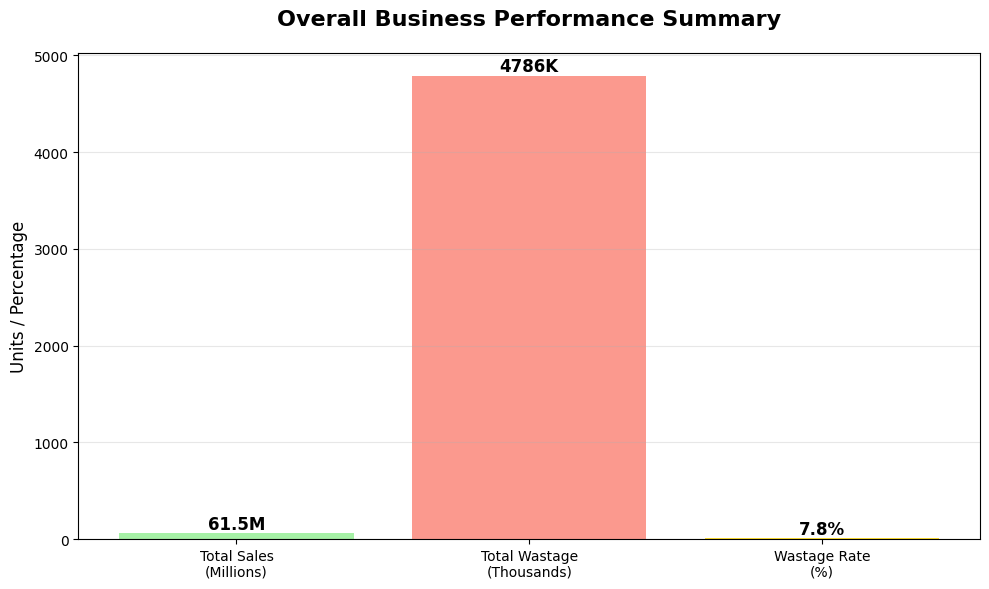

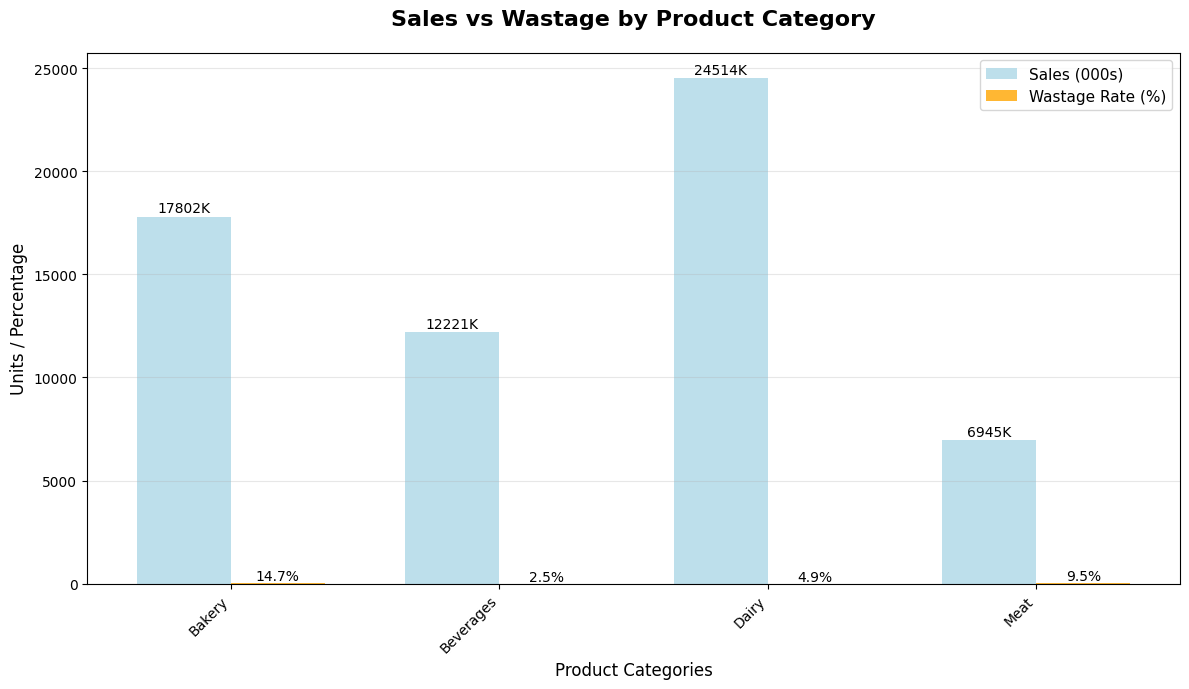

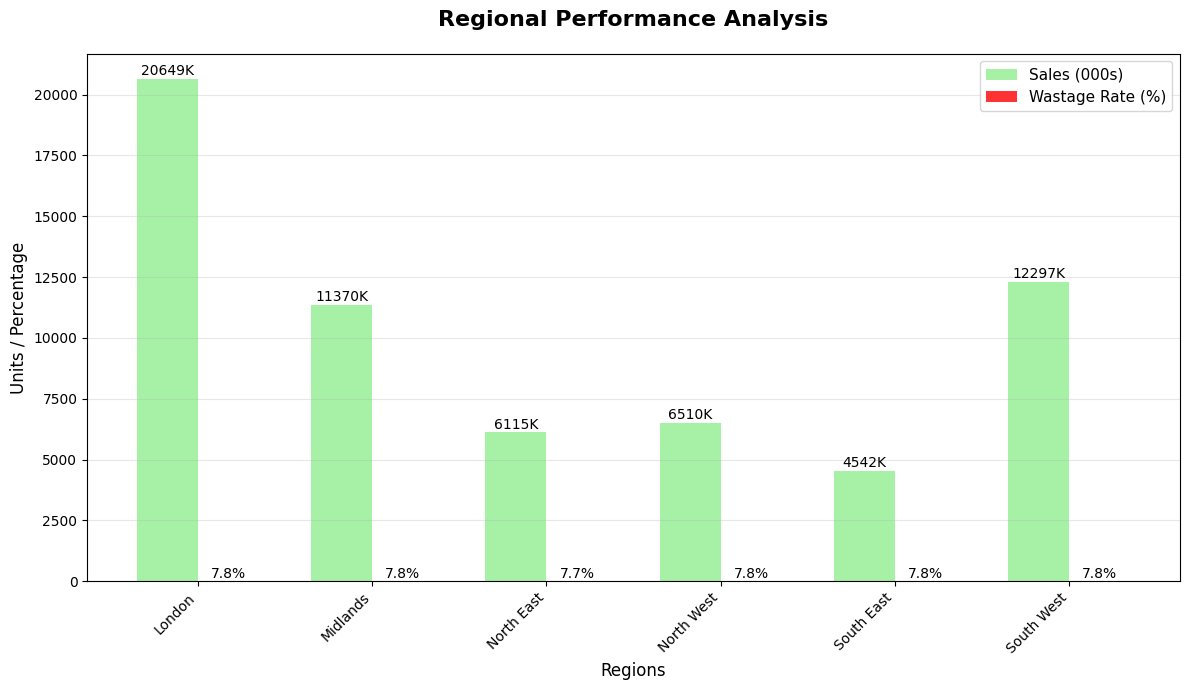

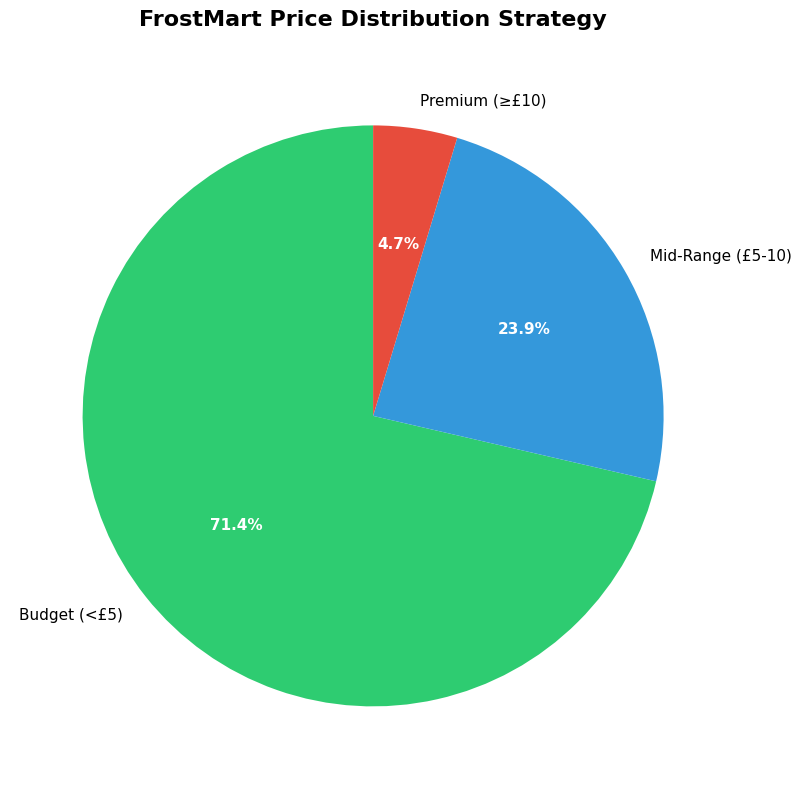

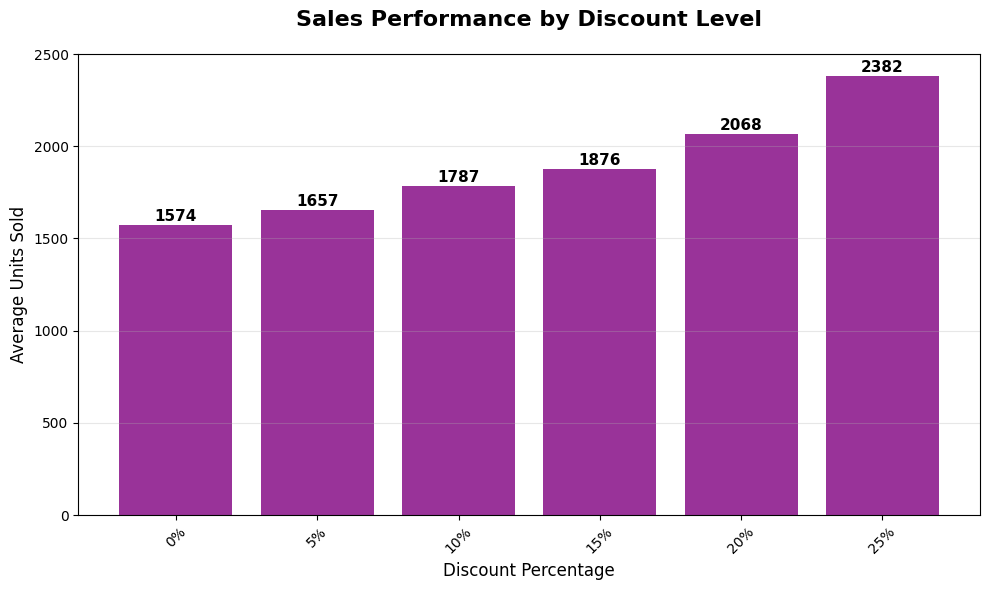

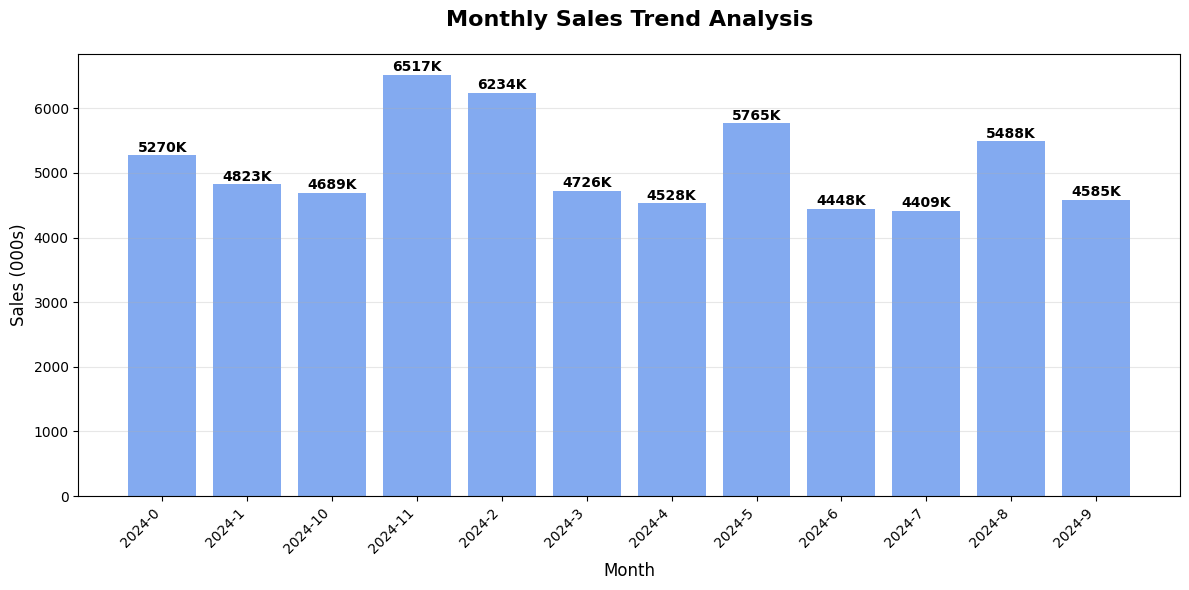

/tmp/ipython-input-442649834.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marketing_performance = weekly_sales.groupby('Marketing_Spend_Category').agg({


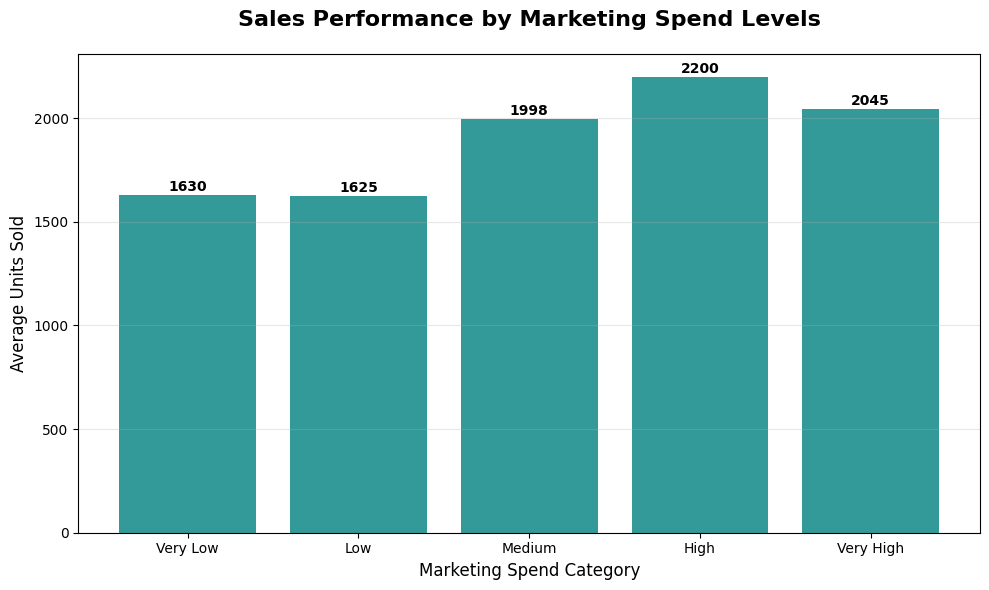

/tmp/ipython-input-442649834.py:185: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shelf_life_performance = shelf_life_data.groupby('Shelf_Life_Category').agg({


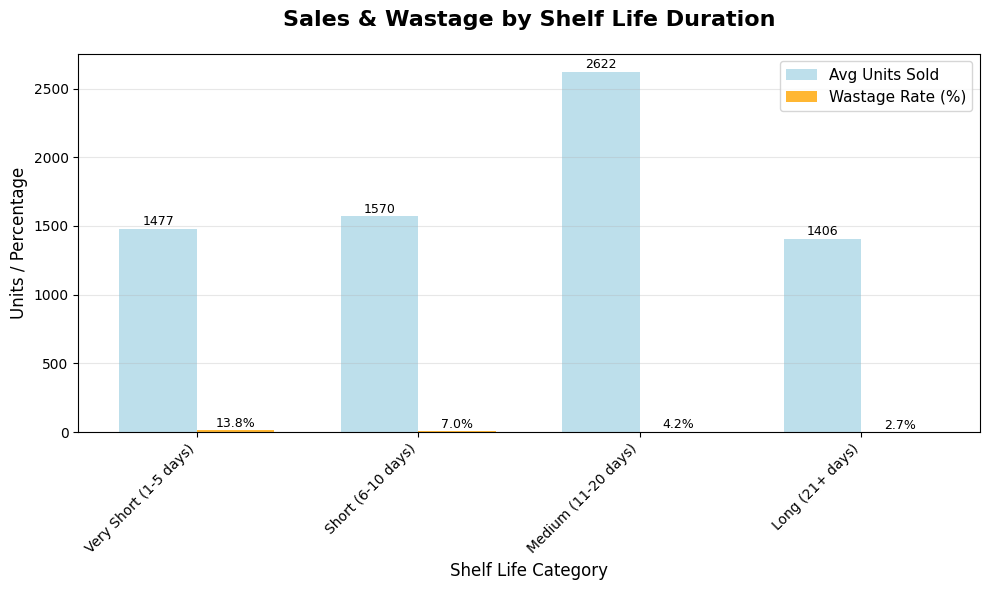

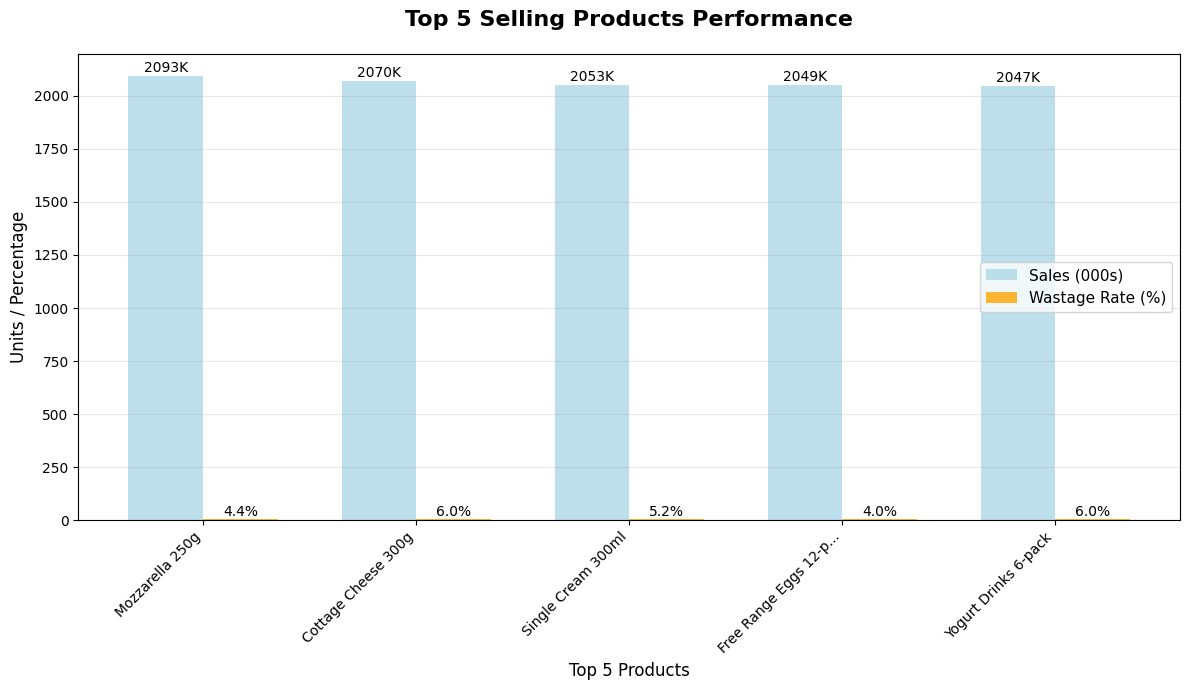


=== EDA COMPLETED SUCCESSFULLY ===

📊 All visualizations have been generated with larger, clearer figures!
🎯 Each chart is now optimized for better readability and presentation.

🔑 KEY BUSINESS INSIGHTS SUMMARY:
✓ Overall wastage rate: 7.8% - Good but can be improved
✓ Dairy products show highest sales
✓ Bakery category has highest wastage rate
✓ London region leads in sales performance
✓ 25.0% discount shows strongest sales impact
✓ Clear seasonal patterns with peak in 2024-11

💡 RECOMMENDATIONS FOR FROSTMART:
1. Implement targeted waste reduction programs for high-wastage categories
2. Optimize inventory levels based on regional performance data
3. Develop category-specific pricing and promotion strategies
4. Enhance seasonal planning using monthly trend analysis
5. Focus on top-performing products while managing their waste effectively
6. Optimize marketing spend based on performance correlation
7. Improve inventory management for short shelf-life products

📈 Total Business Impact:

In [ ]:
# Cell 11: Final Summary Visualization

# Figure 1: Overall Performance Summary
plt.figure(figsize=(10, 6))
performance_data = [total_sales/1000000, total_wastage/1000, wastage_rate]  # Convert to millions and thousands
performance_labels = ['Total Sales\n(Millions)', 'Total Wastage\n(Thousands)', 'Wastage Rate\n(%)']
colors = ['lightgreen', 'salmon', 'gold']
bars = plt.bar(performance_labels, performance_data, color=colors, alpha=0.8)

plt.title('Overall Business Performance Summary', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Units / Percentage', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(performance_data):
    if i == 2:  # Percentage value
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
    elif i == 0:  # Sales in millions
        plt.text(i, v + 0.1, f'{v:.1f}M', ha='center', va='bottom', fontweight='bold', fontsize=12)
    else:  # Wastage in thousands
        plt.text(i, v + 5, f'{v:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Figure 2: Category Performance Comparison
plt.figure(figsize=(12, 7))
categories = category_performance['Product_Category']
sales = category_performance['Units_Sold'] / 1000  # Convert to thousands
wastage_rates = category_performance['Wastage_Rate']

x = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(x - width/2, sales, width, label='Sales (000s)', color='lightblue', alpha=0.8)
bars2 = plt.bar(x + width/2, wastage_rates, width, label='Wastage Rate (%)', color='orange', alpha=0.8)

plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Units / Percentage', fontsize=12)
plt.title('Sales vs Wastage by Product Category', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (sales_val, wastage_val) in enumerate(zip(sales, wastage_rates)):
    plt.text(i - width/2, sales_val + 50, f'{sales_val:.0f}K', ha='center', va='bottom', fontsize=10)
    plt.text(i + width/2, wastage_val + 0.5, f'{wastage_val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Figure 3: Regional Performance
plt.figure(figsize=(12, 7))
regions = regional_performance['Region']
regional_sales = regional_performance['Units_Sold'] / 1000  # Convert to thousands
regional_wastage = regional_performance['Wastage_Rate']

x = np.arange(len(regions))
width = 0.35

bars1 = plt.bar(x - width/2, regional_sales, width, label='Sales (000s)', color='lightgreen', alpha=0.8)
bars2 = plt.bar(x + width/2, regional_wastage, width, label='Wastage Rate (%)', color='red', alpha=0.8)

plt.xlabel('Regions', fontsize=12)
plt.ylabel('Units / Percentage', fontsize=12)
plt.title('Regional Performance Analysis', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, regions, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (sales_val, wastage_val) in enumerate(zip(regional_sales, regional_wastage)):
    plt.text(i - width/2, sales_val + 30, f'{sales_val:.0f}K', ha='center', va='bottom', fontsize=10)
    plt.text(i + width/2, wastage_val + 0.3, f'{wastage_val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Figure 4: Pricing Strategy Analysis
plt.figure(figsize=(10, 8))
# Price distribution analysis
price_ranges = ['Budget (<£5)', 'Mid-Range (£5-10)', 'Premium (≥£10)']
price_counts = [
    (weekly_sales['Price'] < 5).sum(),
    ((weekly_sales['Price'] >= 5) & (weekly_sales['Price'] < 10)).sum(),
    (weekly_sales['Price'] >= 10).sum()
]
colors = ['#2ecc71', '#3498db', '#e74c3c']  # Green, Blue, Red

wedges, texts, autotexts = plt.pie(price_counts, labels=price_ranges, autopct='%1.1f%%',
                                   colors=colors, startangle=90,
                                   textprops={'fontsize': 11})

plt.title('FrostMart Price Distribution Strategy', fontsize=16, fontweight='bold', pad=20)

# Make autopct text larger and bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

# Figure 5: Discount Effectiveness
plt.figure(figsize=(10, 6))
discount_levels = discount_effect['Discount_Percent']
sales_at_discount = discount_effect['Units_Sold']

bars = plt.bar(discount_levels.astype(str) + '%', sales_at_discount, color='purple', alpha=0.8)

plt.title('Sales Performance by Discount Level', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Discount Percentage', fontsize=12)
plt.ylabel('Average Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, sales_at_discount):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Figure 6: Monthly Trends
plt.figure(figsize=(12, 6))
months = monthly_performance['Month']
monthly_sales_trend = monthly_performance['Units_Sold'] / 1000  # Convert to thousands

bars = plt.bar(months, monthly_sales_trend, color='cornflowerblue', alpha=0.8)

plt.title('Monthly Sales Trend Analysis', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (000s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, monthly_sales_trend):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{value:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Figure 7: Marketing Effectiveness (FIXED VERSION)
plt.figure(figsize=(10, 6))
# Create marketing spend categories for visualization
weekly_sales['Marketing_Spend_Category'] = pd.cut(weekly_sales['Marketing_Spend'],
                                                 bins=5,
                                                 labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

marketing_performance = weekly_sales.groupby('Marketing_Spend_Category').agg({
    'Units_Sold': 'mean',
    'Marketing_Spend': 'mean'
}).reset_index()

plt.bar(range(len(marketing_performance)), marketing_performance['Units_Sold'],
        color='teal', alpha=0.8)
plt.title('Sales Performance by Marketing Spend Levels', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Marketing Spend Category', fontsize=12)
plt.ylabel('Average Units Sold', fontsize=12)
plt.xticks(range(len(marketing_performance)), marketing_performance['Marketing_Spend_Category'])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(marketing_performance['Units_Sold']):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Figure 8: Shelf Life Impact Analysis
plt.figure(figsize=(10, 6))
# Create shelf life categories
shelf_life_bins = [0, 5, 10, 20, 365]
shelf_life_labels = ['Very Short (1-5 days)', 'Short (6-10 days)', 'Medium (11-20 days)', 'Long (21+ days)']
shelf_life_data = sales_with_categories.copy()
shelf_life_data['Shelf_Life_Category'] = pd.cut(shelf_life_data['Shelf_Life_Days'],
                                               bins=shelf_life_bins,
                                               labels=shelf_life_labels)

shelf_life_performance = shelf_life_data.groupby('Shelf_Life_Category').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

shelf_life_performance['Wastage_Rate'] = (shelf_life_performance['Wastage_Units'] / shelf_life_performance['Units_Sold']) * 100

x = np.arange(len(shelf_life_performance))
width = 0.35

bars1 = plt.bar(x - width/2, shelf_life_performance['Units_Sold'], width,
                label='Avg Units Sold', color='lightblue', alpha=0.8)
bars2 = plt.bar(x + width/2, shelf_life_performance['Wastage_Rate'], width,
                label='Wastage Rate (%)', color='orange', alpha=0.8)

plt.xlabel('Shelf Life Category', fontsize=12)
plt.ylabel('Units / Percentage', fontsize=12)
plt.title('Sales & Wastage by Shelf Life Duration', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, shelf_life_labels, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (sales_val, wastage_val) in enumerate(zip(shelf_life_performance['Units_Sold'], shelf_life_performance['Wastage_Rate'])):
    plt.text(i - width/2, sales_val + 5, f'{sales_val:.0f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, wastage_val + 0.5, f'{wastage_val:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Figure 9: Top 5 Products Performance
plt.figure(figsize=(12, 7))
top_5_products = product_performance.nlargest(5, 'Units_Sold')

product_names_short = [name[:20] + '...' if len(name) > 20 else name for name in top_5_products['Product_Name']]
sales_values = top_5_products['Units_Sold'] / 1000  # Convert to thousands
wastage_rates = top_5_products['Wastage_Rate']

x = np.arange(len(product_names_short))
width = 0.35

bars1 = plt.bar(x - width/2, sales_values, width, label='Sales (000s)', color='lightblue', alpha=0.8)
bars2 = plt.bar(x + width/2, wastage_rates, width, label='Wastage Rate (%)', color='orange', alpha=0.8)

plt.xlabel('Top 5 Products', fontsize=12)
plt.ylabel('Units / Percentage', fontsize=12)
plt.title('Top 5 Selling Products Performance', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, product_names_short, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (sales_val, wastage_val) in enumerate(zip(sales_values, wastage_rates)):
    plt.text(i - width/2, sales_val + 5, f'{sales_val:.0f}K', ha='center', va='bottom', fontsize=10)
    plt.text(i + width/2, wastage_val + 0.3, f'{wastage_val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("=== EDA COMPLETED SUCCESSFULLY ===")
print("="*60)
print("\n📊 All visualizations have been generated with larger, clearer figures!")
print("🎯 Each chart is now optimized for better readability and presentation.")

print("\n🔑 KEY BUSINESS INSIGHTS SUMMARY:")
print(f"✓ Overall wastage rate: {wastage_rate:.1f}% - Good but can be improved")
print(f"✓ {best_category} products show highest sales")
print(f"✓ {worst_wastage_category} category has highest wastage rate")
print(f"✓ {best_region} region leads in sales performance")
print(f"✓ {best_discount}% discount shows strongest sales impact")
print(f"✓ Clear seasonal patterns with peak in {best_month}")

print("\n💡 RECOMMENDATIONS FOR FROSTMART:")
print("1. Implement targeted waste reduction programs for high-wastage categories")
print("2. Optimize inventory levels based on regional performance data")
print("3. Develop category-specific pricing and promotion strategies")
print("4. Enhance seasonal planning using monthly trend analysis")
print("5. Focus on top-performing products while managing their waste effectively")
print("6. Optimize marketing spend based on performance correlation")
print("7. Improve inventory management for short shelf-life products")

print(f"\n📈 Total Business Impact: {total_sales:,} units sold | {total_wastage:,} units wasted")
print(f"💰 Average Product Price: £{weekly_sales['Price'].mean():.2f}")
print(f"🎯 Improvement Opportunity: Reducing wastage by 1% could save £{(total_sales * 0.01 * weekly_sales['Price'].mean()):,.0f} annually")

# **Merging techniques**

In [ ]:
import pandas as pd

# --- Load your datasets ---
product_details = pd.read_csv("/content/drive/MyDrive/product_details.csv")
weekly_sales = pd.read_csv("/content/drive/MyDrive/weekly_sales.csv")
store_info = pd.read_csv("/content/drive/MyDrive/store_info.csv")
weather_data = pd.read_csv("/content/drive/MyDrive/weather_data.csv")
supplier_info = pd.read_csv("/content/drive/MyDrive/supplier_info.csv")

# --- Step 1: Merge Weekly_Sales with Product_Details ---
frostmark_data = pd.merge(
    weekly_sales,
    product_details,
    on="Product_ID",
    how="left"
)

# --- Step 2: Merge with Store_Info ---
frostmark_data = pd.merge(
    frostmark_data,
    store_info,
    on="Store_ID",
    how="left"
)

# --- Step 3: Merge with Weather_Data ---
# Note: Weather_Data links using Week_Number + Region
frostmark_data = pd.merge(
    frostmark_data,
    weather_data,
    on=["Week_Number", "Region"],
    how="left"
)

# --- Step 4: Merge with Supplier_Info ---
# If Weekly_Sales directly contains Supplier_ID, join on it.
# If Supplier_ID exists in Product_Details instead, merge on that.
if "Supplier_ID" in frostmark_data.columns:
    frostmark_data = pd.merge(
        frostmark_data,
        supplier_info,
        on="Supplier_ID",
        how="left"
    )
elif "Supplier_ID" in product_details.columns:
    frostmark_data = pd.merge(
        frostmark_data,
        supplier_info,
        on="Supplier_ID",
        how="left"
    )




In [ ]:
frostmark_data.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Name,Product_Category,...,Supplier_ID,Region,Store_Size,Cold_Storage_Capacity,Avg_Temperature,Rainfall,Holiday_Flag,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,2024-W01,1000,500,4853,670.37,0,718,2.46,Whole Wheat Bread 800g,Bakery,...,4,London,12000,3788,9.9,23.0,1,PremiumGoods Wholesale,3,48776
1,2024-W01,1001,500,4274,1089.62,0,641,1.27,White Sandwich Loaf,Bakery,...,8,London,12000,3788,9.9,23.0,1,TrustedSource Provisions,3,46959
2,2024-W01,1002,500,4215,1004.99,10,632,2.74,Croissant 4-pack,Bakery,...,5,London,12000,3788,9.9,23.0,1,LocalHarvest Distributors,2,11306
3,2024-W01,1003,500,5768,859.45,20,853,1.82,Blueberry Muffins 6-pack,Bakery,...,10,London,12000,3788,9.9,23.0,1,BestQuality Foods Ltd.,2,53748
4,2024-W01,1004,500,3403,576.70,0,503,3.46,Chocolate Chip Cookies,Bakery,...,7,London,12000,3788,9.9,23.0,1,SwiftDelivery Foods UK,2,59474


In [ ]:
frostmark_data.shape

(37440, 21)

In [ ]:
frostmark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Week_Number            37440 non-null  object 
 1   Product_ID             37440 non-null  int64  
 2   Store_ID               37440 non-null  int64  
 3   Units_Sold             37440 non-null  int64  
 4   Marketing_Spend        37440 non-null  float64
 5   Discount_Percent       37440 non-null  int64  
 6   Wastage_Units          37440 non-null  int64  
 7   Price                  37440 non-null  float64
 8   Product_Name           37440 non-null  object 
 9   Product_Category       37440 non-null  object 
 10  Shelf_Life_Days        37440 non-null  int64  
 11  Supplier_ID            37440 non-null  int64  
 12  Region                 37440 non-null  object 
 13  Store_Size             37440 non-null  int64  
 14  Cold_Storage_Capacity  37440 non-null  int64  
 15  Av

In [ ]:
features = [
    "Marketing_Spend",
    "Discount_Percent",
    "Wastage_Units",
    "Price",
    "Product_Category",
    "Shelf_Life_Days",
    "Region",
    "Store_Size",
    "Cold_Storage_Capacity",
    "Avg_Temperature",
    "Rainfall",
    "Holiday_Flag",
    "Lead_Time_Days",
    "Supply_Capacity"
]
target = "Units_Sold"


In [ ]:
frostmark_data = frostmark_data[features + [target]]
frostmark_data.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Category,Shelf_Life_Days,Region,Store_Size,Cold_Storage_Capacity,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Units_Sold
0,670.37,0,718,2.46,Bakery,4,London,12000,3788,9.9,23.0,1,3,48776,4853
1,1089.62,0,641,1.27,Bakery,2,London,12000,3788,9.9,23.0,1,3,46959,4274
2,1004.99,10,632,2.74,Bakery,2,London,12000,3788,9.9,23.0,1,2,11306,4215
3,859.45,20,853,1.82,Bakery,4,London,12000,3788,9.9,23.0,1,2,53748,5768
4,576.70,0,503,3.46,Bakery,4,London,12000,3788,9.9,23.0,1,2,59474,3403


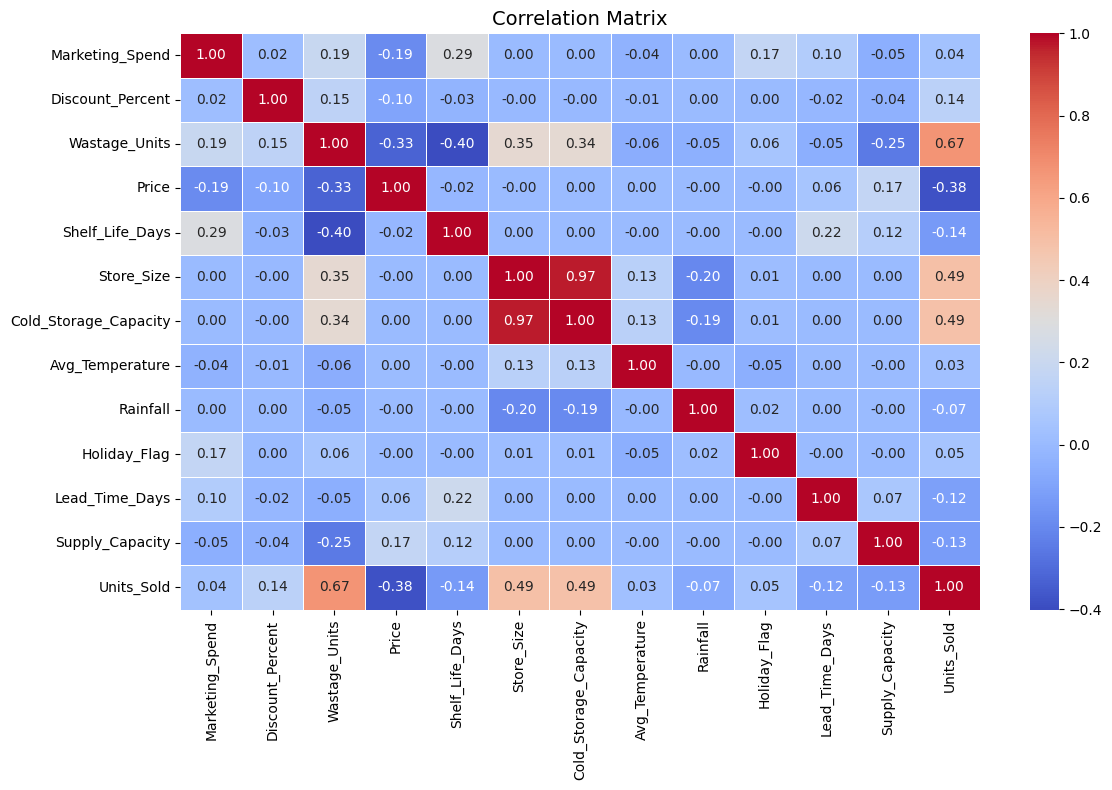

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = frostmark_data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
frostmark_data[['Store_Size', 'Cold_Storage_Capacity']].corr()

,Store_Size,Cold_Storage_Capacity
Store_Size,1.000000,0.971561
Cold_Storage_Capacity,0.971561,1.000000


## **The Store Size and Cold Storage Capacity is highly correlating**


we have to drop a column, which is the cold storage capacity

In [ ]:
frostmark_data.drop('Cold_Storage_Capacity', axis=1, inplace=True)

In [ ]:
frostmark_data.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Category,Shelf_Life_Days,Region,Store_Size,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Units_Sold
0,670.37,0,718,2.46,Bakery,4,London,12000,9.9,23.0,1,3,48776,4853
1,1089.62,0,641,1.27,Bakery,2,London,12000,9.9,23.0,1,3,46959,4274
2,1004.99,10,632,2.74,Bakery,2,London,12000,9.9,23.0,1,2,11306,4215
3,859.45,20,853,1.82,Bakery,4,London,12000,9.9,23.0,1,2,53748,5768
4,576.70,0,503,3.46,Bakery,4,London,12000,9.9,23.0,1,2,59474,3403


In [ ]:
frostmark_data = pd.get_dummies(frostmark_data, columns=["Product_Category", "Region"], drop_first=True)
frostmark_data = frostmark_data.astype(int)
frostmark_data.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Shelf_Life_Days,Store_Size,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Units_Sold,Product_Category_Beverages,Product_Category_Dairy,Product_Category_Meat,Region_Midlands,Region_North East,Region_North West,Region_South East,Region_South West
0,670,0,718,2,4,12000,9,23,1,3,48776,4853,0,0,0,0,0,0,0,0
1,1089,0,641,1,2,12000,9,23,1,3,46959,4274,0,0,0,0,0,0,0,0
2,1004,10,632,2,2,12000,9,23,1,2,11306,4215,0,0,0,0,0,0,0,0
3,859,20,853,1,4,12000,9,23,1,2,53748,5768,0,0,0,0,0,0,0,0
4,576,0,503,3,4,12000,9,23,1,2,59474,3403,0,0,0,0,0,0,0,0


## **Split Data into Training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = frostmark_data.drop(target, axis=1)
y = frostmark_data['Units_Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X_test.head()

,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Shelf_Life_Days,Store_Size,Avg_Temperature,Rainfall,Holiday_Flag,Lead_Time_Days,Supply_Capacity,Product_Category_Beverages,Product_Category_Dairy,Product_Category_Meat,Region_Midlands,Region_North East,Region_North West,Region_South East,Region_South West
36732,636,15,225,6,3,12000,11,10,1,2,53748,0,0,1,0,0,0,0,0
25961,483,0,122,6,242,12000,18,9,0,2,35230,1,0,0,0,0,0,0,0
12307,105,5,69,7,5,5000,4,8,0,2,59474,0,0,1,1,0,0,0,0
27358,731,0,48,0,158,3000,18,10,0,3,46959,1,0,0,0,0,0,0,1
7249,431,0,239,1,2,5000,2,25,0,3,46959,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

linear = LinearRegression()
scaler = StandardScaler()


In [ ]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
base_model = linear.fit(X_train_scaled, y_train)
base_model.score(X_test_scaled, y_test)

0.8468220575816134

In [ ]:
base_model_pred = base_model.predict(X_test_scaled)
base_model_pred[:10]

array([2552.84185232, 2518.37990384,  646.35605981, 1222.89528482,
       1449.93074131, 2522.48525527, 2270.05821349,  533.14890884,
       1060.01500664, 1170.91604896])

In [ ]:
y_test[:10]

,Units_Sold
36732,2151
25961,4883
12307,730
27358,1944
7249,1594
4592,2284
34924,2043
20653,886
34618,1217
11973,834
